# MCTS vs Minimax Comparative Analysis

This notebook contains code to conduct comparitive analysis of the performance of the MCTS and minimax agents.

In [1]:
# Change working directory so imports work in Jupyter
import os
os.chdir("..")

**Define a function to generate random valid game boards:**

In [2]:
import rules
import random
import numpy as np

def generate_random_board():
    """ Returns a random valid Tic Tac Toe game board with at least one move 
    remaining. """
    board = np.asarray([[0, 0, 0], [0, 0, 0], [0, 0, 0]])

    # Choose a starting player and game length
    side = random.choice([rules.CROSS, rules.NOUGHT])
    game_length = random.randint(0, 8)

    # Select moves for each player until the game length has been reached
    move_count = 0
    while move_count < game_length:
        move_count += 1
        empty_cells = rules.empty_cells(board)
        move = tuple(empty_cells[random.randint(0, len(empty_cells) - 1)])
        board[move] = side
        if rules.winner(board):
            board[move] = rules.EMPTY
        else:
            side = -side

    # Return the game board and the side of the next player to move
    return board, side

**Generate a random board to test the agents:**

In [3]:
board, side = generate_random_board()
# board = np.asarray([[-1, -1, 0], [0, 0, 0], [0, 1, 0]])
# side = 1
print("Starting board ({} moves next):\n{}".format(
        rules.token(side), rules.board_str(board)))

Starting board (x moves next):
o| | 
 |o| 
 |x| 


**Measure how long it takes the minimax agent to find the optimal moves:**

In [4]:
import time
from agents.minimax import MiniMaxAgent

minimax_agent = MiniMaxAgent()
minimax_agent.side = side

t = time.time()
_, minimax_moves = minimax_agent.minimax(board, minimax_agent.side)
minimax_time = round(time.time() - t, 6)

print "Minimax time:", minimax_time

Minimax time: 0.036


**Measure how long it takes the MCTS agent to find the optimal moves:**

In [5]:
from agents.mcts_ucb1 import MCTSAgentUCB1, UCTTreeNode

max_iterations = 2 * len(rules.empty_cells(board))**2  # the square of the number of free cells
print "Convergence limit:", max_iterations
mcts_agent = MCTSAgentUCB1(convergence_limit=max_iterations)
mcts_agent.side = side

t = time.time()
mcts_moves = mcts_agent.moves(board)
mcts_time = round(time.time() - t, 6)

print "Number of MCTS playouts:", mcts_agent.playout_count

print "\nMCTS time:", mcts_time

Convergence limit: 72
Number of MCTS playouts: 130

MCTS time: 0.031


**Display a graph of the tree generated by the MCTS agent:**

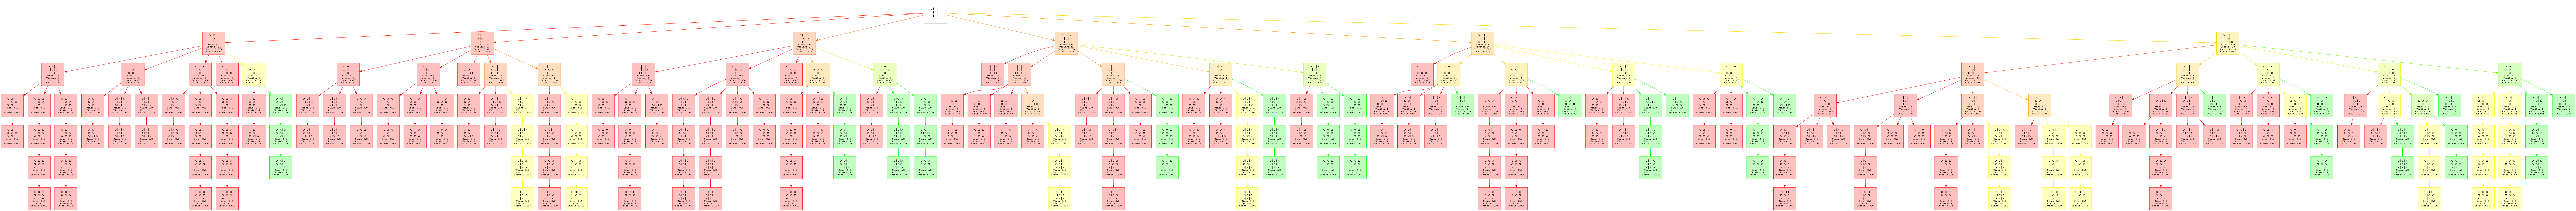

In [6]:
from IPython.display import display_png
import pygraphviz as pgv
from graphing.mcts_graph import MCTSGraph

g = MCTSGraph()
#g.verbose_score = False
a = g.generate_graph(mcts_agent.root_node)

display_png(g.draw_graph(format='png'), raw=True)

**Compare the time taken by each agent to find the optimal move/s:**

In [7]:
print("Minimax optimal moves: {}\nMCTS optimal moves: {}".format(minimax_moves.tolist(), mcts_moves))

print("\nTime to calculate optimal move {}:\n  Minimax\t{} s\n  MCTS\t\t{} s".format(mcts_moves, minimax_time, mcts_time))

Minimax optimal moves: [[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 2]]
MCTS optimal moves: [(2, 2)]

Time to calculate optimal move [(2, 2)]:
  Minimax	0.036 s
  MCTS		0.031 s
